In [2]:
import pandas as pd
import numpy as np

In [3]:
#open the dataset
df = pd.read_csv("cleaner_results_inputed.csv")

In [19]:
df.columns

Index(['Unnamed: 0', 'question_type', 'question_lowered_nospace',
       'openai_model', 'referential_title', 'dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
       'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', 'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato', 'correct_count', 'omit_count', 'google_model',
       'dataset'],
      dtype='object')

In [4]:
def subset_the_df(df,filtered_columns, columns_to_be_compacted, new_column ):
    #filtered columns is always columns to be compacted+a measurment so we can just add the measurement
    #filtered_columns = columns_to_be_compacted.append(filtered_column)
    print(filtered_columns)
    #filter the columns and create a new column via idxmax
    intermediate_plot = df[filtered_columns]
    intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)

    #drop all the columns we compacted, we dont need them anymore
    final_plot =intermediate_plot.drop(columns_to_be_compacted, axis=1)
    return final_plot

highjacking to see which plot types do better in which questions

In [5]:
plot_type_And_question_type = subset_the_df(df, ["question_type", "omit_count", "correct_count",'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100'], ['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100'], "plot_type")

['question_type', 'omit_count', 'correct_count', 'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100']


C:\Users\matheus\AppData\Local\Temp\ipykernel_78740\343660625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)


In [37]:
plot_type_And_question_type

,question_type,omit_count,correct_count,plot_type
0,Retrieve Value,20,0,plot_type_line
1,Retrieve Value,0,20,plot_type_line
2,Retrieve Value,0,20,plot_type_line
3,Retrieve Value,0,20,plot_type_line
4,Retrieve Value,0,20,plot_type_line
...,...,...,...,...
3235,Make Comparisons,20,0,plot_type_bar
3236,Make Comparisons,0,3,plot_type_bar
3237,Make Comparisons,19,0,plot_type_bar
3238,Make Comparisons,1,5,plot_type_bar


In [6]:
grouped_means = plot_type_And_question_type.groupby(["plot_type", "question_type"]).mean()

grouped_means

omit_count  \
plot_type                 question_type                                     
plot_type_bar             Determine Range                        1.925000   
                          Find Correlations/Trends               7.637500   
                          Find Extremum                          0.025000   
                          Make Comparisons                       5.606250   
                          Retrieve Value                         0.675000   
plot_type_hist            Characterize Distribution              0.025000   
                          Find Extremum                          0.000000   
                          Identify the Characteristic of Bins    9.575000   
                          Make Comparisons                       4.800000   
                          Retrieve Value                         0.925000   
plot_type_line            Determine Range                        2.812500   
                          Find Correlations/Trends               5.000000   
                          Find Extremum                          0.025000   
                          Make Comparisons                       4.306250   
                          Retrieve Value                         4.712500   
plot_type_pie             Find Extremum                          0.000000   
                          Make Comparisons                       0.025000   
                          Retrieve Value                         0.000000   
plot_type_scatter         Determine Range                        4.568750   
                          Find Anomalies                         0.650000   
                          Find Clusters                         10.350000   
                          Find Correlations/Trends               4.566667   
                          Find Extremum                          0.350000   
                          Make Comparisons                       4.445000   
                          Retrieve Value                         2.055000   
plot_type_stacked_bar     Find Extremum                          0.787500   
                          Make Comparisons                      10.908333   
                          Retrieve Value                        11.606250   
plot_type_stacked_bar_100 Find Extremum                          4.950000   
                          Make Comparisons                       1.833333   
                          Retrieve Value                        13.633333   

                                                               correct_count  
plot_type                 question_type                                       
plot_type_bar             Determine Range                          10.900000  
                          Find Correlations/Trends                 12.362500  
                          Find Extremum                            18.593750  
                          Make Comparisons                          7.150000  
                          Retrieve Value                            9.200000  
plot_type_hist            Characterize Distribution                 1.950000  
                          Find Extremum                            16.025000  
                          Identify the Characteristic of Bins      10.000000  
                          Make Comparisons                         14.275000  
                          Retrieve Value                           16.925000  
plot_type_line            Determine Range                          16.337500  
                          Find Correlations/Trends                 15.000000  
                          Find Extremum                            14.725000  
                          Make Comparisons                          6.012500  
                          Retrieve Value                            7.443750  
plot_type_pie             Find Extremum                            20.000000  
                          Make Comparisons                         16.575000  
                    

highjacking again to see plot title 

In [ ]:
df_title = df[['question_type', "omit_count", "correct_count",'referential_title']]

In [8]:
def binary_to_referential_normal(df, column_name):
  """
  Transforms a binary column (1/0) in a pandas DataFrame to a categorical column 
  with "referential" for 1 and "normal" for 0.

  Args:
    df: pandas DataFrame.
    column_name: Name of the column to transform.

  Returns:
    pandas DataFrame with the modified column.
  """

  if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

  if not pd.api.types.is_numeric_dtype(df[column_name]):
        raise ValueError(f"Column '{column_name}' is not numeric.")

  if set(df[column_name].unique()) != {0, 1}:
        raise ValueError(f"Column '{column_name}' does not contain only 0 and 1.")

  df[column_name] = df[column_name].apply(lambda x: "referential" if x == 1 else "normal")
  return df

In [9]:
newdf = binary_to_referential_normal(df_title, "referential_title")

C:\Users\matheus\AppData\Local\Temp\ipykernel_78740\1551155526.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: "referential" if x == 1 else "normal")


In [10]:
referential_cc = newdf[newdf["referential_title"] == "referential"]["omit_count"]
normal_cc = newdf[newdf["referential_title"] == "normal"]["omit_count"]

In [11]:
# data is by no means normally distributed so no ANOVA, lets see if any of them distance themselves significantly
# Kruskal-Wallis test (non-parametric alternative)

import scipy.stats as stats
h_stat, p_value = stats.kruskal(referential_cc, normal_cc)

print(f"H-statistic: {h_stat:.3f}, P-value: {p_value:.3f}")


H-statistic: 1.457, P-value: 0.227


highjacking it here to create statistics about color palettes

ill actually go straight for the statistical test

In [12]:
df_pre = subset_the_df(df, ['question_type', "omit_count", "correct_count",
                      'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato'], ['color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato'], "color_type")

df_pre

['question_type', 'omit_count', 'correct_count', 'color_black', 'color_burlywood', 'color_chartreuse', 'color_lightgray', 'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown', 'color_tomato']


C:\Users\matheus\AppData\Local\Temp\ipykernel_78740\343660625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)


,question_type,omit_count,correct_count,color_type
0,Retrieve Value,20,0,color_black
1,Retrieve Value,0,20,color_burlywood
2,Retrieve Value,0,20,color_chartreuse
3,Retrieve Value,0,20,color_lightgray
4,Retrieve Value,0,20,color_lightpink
...,...,...,...,...
3235,Make Comparisons,20,0,color_mediumvioletred
3236,Make Comparisons,0,3,color_chartreuse
3237,Make Comparisons,19,0,color_chartreuse
3238,Make Comparisons,1,5,color_burlywood


In [13]:
plot_types = list(df_pre["color_type"].unique())
list_of_dfs = []
for i in plot_types:
    df = df_pre[df_pre["color_type"] == i]
    list_of_dfs.append(df)

color_black = list_of_dfs[0]["omit_count"]
burlywoord = list_of_dfs[1]["omit_count"]
chartreuse = list_of_dfs[2]["omit_count"]
lightgray= list_of_dfs[3]["omit_count"]
lightpink = list_of_dfs[4]["omit_count"]
mediumvioletred = list_of_dfs[5]["omit_count"]
navy = list_of_dfs[6]["omit_count"]
red = list_of_dfs[7]["omit_count"]
saddlebrown = list_of_dfs[8]["omit_count"]
tomato = list_of_dfs[9]["omit_count"]

#get the correct counts for each
'''
line_df_cc = color_black["correct_count"]
stacked_bar_100_cc = stacked_bar_100["correct_count"]
stacked_bar_cc= stacked_bar["correct_count"]
scatter_cc = scatter["correct_count"]
bar_cc = bar["correct_count"]
pie_cc = pie["correct_count"]
hist_cc = hist["correct_count"]'
'''

'\nline_df_cc = color_black["correct_count"]\nstacked_bar_100_cc = stacked_bar_100["correct_count"]\nstacked_bar_cc= stacked_bar["correct_count"]\nscatter_cc = scatter["correct_count"]\nbar_cc = bar["correct_count"]\npie_cc = pie["correct_count"]\nhist_cc = hist["correct_count"]\'\n'

In [14]:
# data is by no means normally distributed so no ANOVA, lets see if any of them distance themselves significantly
# Kruskal-Wallis test (non-parametric alternative)

import scipy.stats as stats
h_stat, p_value = stats.kruskal(color_black, burlywoord, chartreuse, lightgray, lightpink, mediumvioletred, navy, red, saddlebrown, tomato)

print(f"H-statistic: {h_stat:.3f}, P-value: {p_value:.3f}")


H-statistic: 6.544, P-value: 0.684


this below is origin plot and transformational plot analysis

In [15]:
df2 = subset_the_df(df, ['question_type', 'dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
       'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', "omit_count", "correct_count"], ['dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv'], "original_dataset")

['question_type', 'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv', 'dataset_bar_data.csv', 'dataset_histogram_data.csv', 'dataset_line_data.csv', 'dataset_pie_data.csv', 'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv', 'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100', 'omit_count', 'correct_count']


KeyError: "['dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv', 'dataset_bar_data.csv', 'dataset_histogram_data.csv', 'dataset_line_data.csv', 'dataset_pie_data.csv', 'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv', 'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100'] not in index"

In [24]:
df3 = subset_the_df(df2, df2.columns, ['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100'], "plot_type")

Index(['question_type', 'plot_type_bar', 'plot_type_hist', 'plot_type_line',
       'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', 'omit_count', 'correct_count',
       'original_dataset'],
      dtype='object')


In [50]:
df3

,question_type,omit_count,correct_count,original_dataset,plot_type
0,Retrieve Value,20,0,dataset_stacked_area_data.csv,plot_type_line
1,Retrieve Value,0,20,dataset_stacked_area_data.csv,plot_type_line
2,Retrieve Value,0,20,dataset_stacked_area_data.csv,plot_type_line
3,Retrieve Value,0,20,dataset_stacked_area_data.csv,plot_type_line
4,Retrieve Value,0,20,dataset_stacked_area_data.csv,plot_type_line
...,...,...,...,...,...
3235,Make Comparisons,20,0,dataset_area_data.csv,plot_type_bar
3236,Make Comparisons,0,3,dataset_area_data.csv,plot_type_bar
3237,Make Comparisons,19,0,dataset_area_data.csv,plot_type_bar
3238,Make Comparisons,1,5,dataset_area_data.csv,plot_type_bar


In [63]:
df3.to_excel("basic_plot_comparision.xlsx")

lets try to get some more stats

In [73]:
result = df3.groupby("plot_type").agg(
    prop_20=("omit_count", lambda x: (x == 20).sum() / len(x)),
    prop_0=("omit_count", lambda x: (x == 0).sum() / len(x))
).reset_index()

In [74]:
result.to_excel("percentage_omit.xlsx")

In [69]:
result2 = df3.groupby(["plot_type", "correct_count"]).size().unstack(fill_value=0)

In [71]:
result2.to_excel("size_Acc.xlsx")

this here will be some statistical tests

In [ ]:
plot_types = list(df3["plot_type"].unique())
list_of_dfs = []
for i in plot_types:
    df = df3[df3["plot_type"] == i]
    list_of_dfs.append(df)

line_df = list_of_dfs[0]
stacked_bar_100 = list_of_dfs[1]
stacked_bar = list_of_dfs[2]
scatter= list_of_dfs[3]
bar = list_of_dfs[4]
pie = list_of_dfs[5]
hist = list_of_dfs[6]



In [56]:
#get the correct counts for each
line_df_cc = line_df["correct_count"]
stacked_bar_100_cc = stacked_bar_100["correct_count"]
stacked_bar_cc= stacked_bar["correct_count"]
scatter_cc = scatter["correct_count"]
bar_cc = bar["correct_count"]
pie_cc = pie["correct_count"]
hist_cc = hist["correct_count"]

In [57]:
# data is by no means normally distributed so no ANOVA, lets see if any of them distance themselves significantly
# Kruskal-Wallis test (non-parametric alternative)

import scipy.stats as stats
h_stat, p_value = stats.kruskal(line_df_cc, pie_cc, bar_cc, stacked_bar_100_cc, stacked_bar_cc, scatter_cc, hist_cc)

print(f"H-statistic: {h_stat:.3f}, P-value: {p_value:.3f}")


H-statistic: 394.519, P-value: 0.000


at least one plot type is significantly different than the others!

In [ ]:
pip install scikit-posthocs

In [59]:
import scikit_posthocs as sp
import numpy as np

# Combine data
data = [line_df_cc, pie_cc, bar_cc, stacked_bar_100_cc, stacked_bar_cc, scatter_cc, hist_cc]

# Dunn's test with Bonferroni correction for multiple comparisons
dunn_results = sp.posthoc_dunn(data, p_adjust='bonferroni')

# Print results
print(dunn_results)


              1             2             3             4             5  \
1  1.000000e+00  6.612839e-20  1.000000e+00  1.197879e-15  3.479146e-25   
2  6.612839e-20  1.000000e+00  2.152975e-16  9.586579e-45  2.670741e-54   
3  1.000000e+00  2.152975e-16  1.000000e+00  3.903802e-22  6.401736e-34   
4  1.197879e-15  9.586579e-45  3.903802e-22  1.000000e+00  1.000000e+00   
5  3.479146e-25  2.670741e-54  6.401736e-34  1.000000e+00  1.000000e+00   
6  1.000000e+00  4.446366e-19  1.000000e+00  4.090778e-21  2.023686e-33   
7  1.000000e+00  1.628915e-12  1.000000e+00  4.285668e-12  5.100025e-18   

              6             7  
1  1.000000e+00  1.000000e+00  
2  4.446366e-19  1.628915e-12  
3  1.000000e+00  1.000000e+00  
4  4.090778e-21  4.285668e-12  
5  2.023686e-33  5.100025e-18  
6  1.000000e+00  1.000000e+00  
7  1.000000e+00  1.000000e+00  


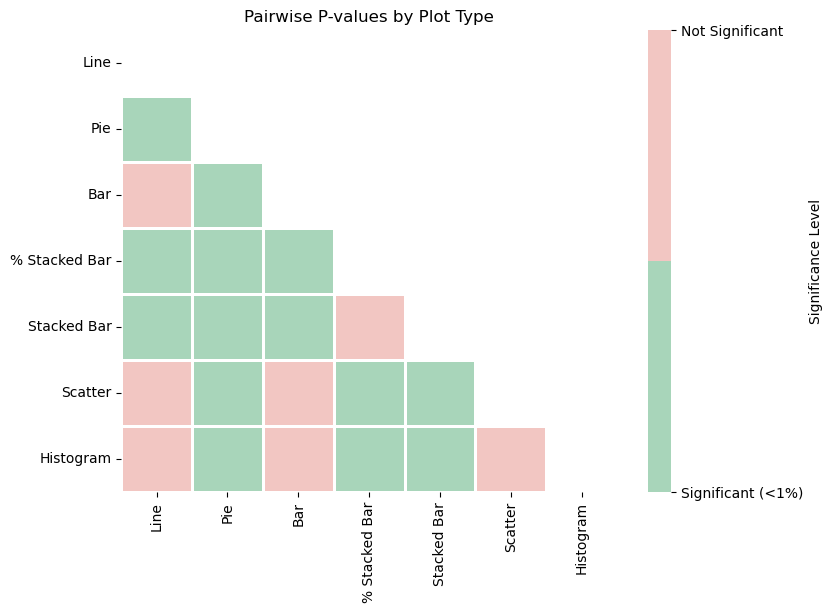

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your pairwise p-value matrix
p_values = np.array([
    [1.000000e+00, 6.612839e-20, 1.000000e+00, 1.197879e-15, 3.479146e-25, 1.000000e+00, 1.000000e+00],
    [6.612839e-20, 1.000000e+00, 2.152975e-16, 9.586579e-45, 2.670741e-54, 4.446366e-19, 1.628915e-12],
    [1.000000e+00, 2.152975e-16, 1.000000e+00, 3.903802e-22, 6.401736e-34, 1.000000e+00, 1.000000e+00],
    [1.197879e-15, 9.586579e-45, 3.903802e-22, 1.000000e+00, 1.000000e+00, 4.090778e-21, 4.285668e-12],
    [3.479146e-25, 2.670741e-54, 6.401736e-34, 1.000000e+00, 1.000000e+00, 2.023686e-33, 5.100025e-18],
    [1.000000e+00, 4.446366e-19, 1.000000e+00, 4.090778e-21, 2.023686e-33, 1.000000e+00, 1.000000e+00],
    [1.000000e+00, 1.628915e-12, 1.000000e+00, 4.285668e-12, 5.100025e-18, 1.000000e+00, 1.000000e+00]
])

# Convert to DataFrame for better labeling
groups = ["Line", "Pie", "Bar", "% Stacked Bar", "Stacked Bar", "Scatter", "Histogram"]
df_p_values = pd.DataFrame(p_values, index=groups, columns=groups)

# Define categories
threshold = 0.01
p_value_categories = df_p_values.copy()
p_value_categories[df_p_values < threshold] = 0  # Significant (<1%)
p_value_categories[df_p_values >= threshold] = 1  # Not Significant

# Define a pastel color palette
colors = ["#A8D5BA", "#F2C6C2"]  # Soft green for significant, soft red for not significant
cmap = sns.color_palette(colors, as_cmap=True)

# Create heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(p_value_categories, annot=False, cmap=cmap, cbar=True, 
                 linewidths=0.8, linecolor="white", mask=np.triu(np.ones_like(df_p_values, dtype=bool)),
                 cbar_kws={"ticks": [0, 1], "label": "Significance Level"})

# Adjust colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(["Significant (<1%)", "Not Significant"])

plt.title("Pairwise P-values by Plot Type")
plt.savefig("statistical_test.png")
plt.show()


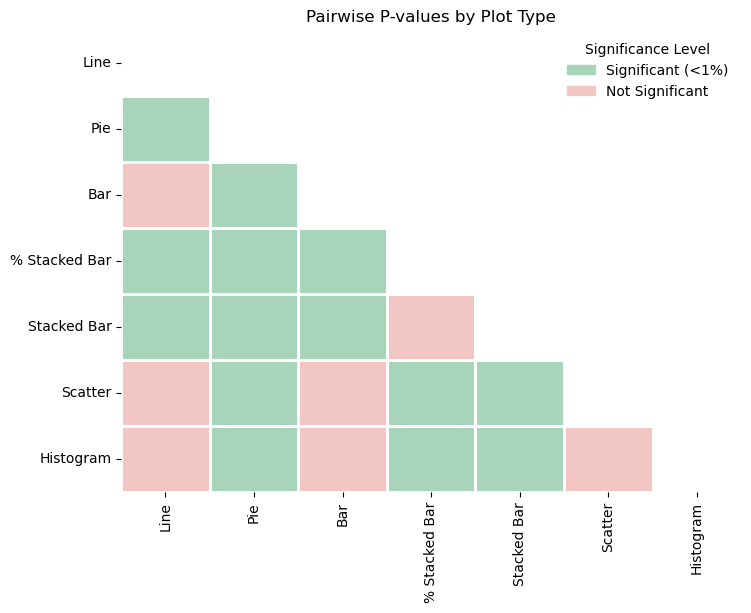

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Your pairwise p-value matrix
p_values = np.array([
    [1.000000e+00, 6.612839e-20, 1.000000e+00, 1.197879e-15, 3.479146e-25, 1.000000e+00, 1.000000e+00],
    [6.612839e-20, 1.000000e+00, 2.152975e-16, 9.586579e-45, 2.670741e-54, 4.446366e-19, 1.628915e-12],
    [1.000000e+00, 2.152975e-16, 1.000000e+00, 3.903802e-22, 6.401736e-34, 1.000000e+00, 1.000000e+00],
    [1.197879e-15, 9.586579e-45, 3.903802e-22, 1.000000e+00, 1.000000e+00, 4.090778e-21, 4.285668e-12],
    [3.479146e-25, 2.670741e-54, 6.401736e-34, 1.000000e+00, 1.000000e+00, 2.023686e-33, 5.100025e-18],
    [1.000000e+00, 4.446366e-19, 1.000000e+00, 4.090778e-21, 2.023686e-33, 1.000000e+00, 1.000000e+00],
    [1.000000e+00, 1.628915e-12, 1.000000e+00, 4.285668e-12, 5.100025e-18, 1.000000e+00, 1.000000e+00]
])

# Convert to DataFrame for better labeling
groups = ["Line", "Pie", "Bar", "% Stacked Bar", "Stacked Bar", "Scatter", "Histogram"]
df_p_values = pd.DataFrame(p_values, index=groups, columns=groups)

# Define categories
threshold = 0.01
p_value_categories = df_p_values.copy()
p_value_categories[df_p_values < threshold] = 0  # Significant (<1%)
p_value_categories[df_p_values >= threshold] = 1  # Not Significant

# Define a pastel color palette
colors = ["#A8D5BA", "#F2C6C2"]  # Soft green for significant, soft red for not significant
cmap = sns.color_palette(colors, as_cmap=True)

# Create heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(p_value_categories, annot=False, cmap=cmap, cbar=False, 
                 linewidths=0.8, linecolor="white", mask=np.triu(np.ones_like(df_p_values, dtype=bool)))

# Create custom legend with two squares
legend_patches = [
    mpatches.Patch(color="#A8D5BA", label="Significant (<1%)"),  # Green
    mpatches.Patch(color="#F2C6C2", label="Not Significant")      # Red
]
plt.legend(handles=legend_patches, loc="upper right", title="Significance Level", frameon=False)

plt.title("Pairwise P-values by Plot Type")
plt.savefig("statistical_test.svg")
plt.show()


this direction goes towards transformational analysis

In [26]:
df4 = df3.groupby(['original_dataset', 'plot_type'])[['omit_count', 'correct_count']].mean().reset_index()

In [32]:
keys = list(set(list(df4["original_dataset"].values)))

In [33]:
keys

['dataset_bar_data.csv',
 'dataset_100_stacked_bar_data.csv',
 'dataset_scatterplot_data.csv',
 'dataset_line_data.csv',
 'dataset_area_data.csv',
 'dataset_stacked_bar_data.csv',
 'dataset_pie_data.csv',
 'dataset_histogram_data.csv',
 'dataset_stacked_area_data.csv']

In [34]:
given_values = ["plot_type_bar","plot_type_stacked_bar_100", "plot_type_scatterplot", "plot_type_line", "plot_type_line", "plot_type_stacked_bar", "plot_type_pie", "plot_type_hist", "plot_type_stacked_bar"]

In [35]:
# Create DataFrame from lists
key_df = pd.DataFrame({'original_dataset': keys, 'original_plot_type': given_values})

In [49]:
key_df

,original_dataset,original_plot_type
0,dataset_bar_data.csv,plot_type_bar
1,dataset_100_stacked_bar_data.csv,plot_type_stacked_bar_100
2,dataset_scatterplot_data.csv,plot_type_scatterplot
3,dataset_line_data.csv,plot_type_line
4,dataset_area_data.csv,plot_type_line
5,dataset_stacked_bar_data.csv,plot_type_stacked_bar
6,dataset_pie_data.csv,plot_type_pie
7,dataset_histogram_data.csv,plot_type_hist
8,dataset_stacked_area_data.csv,plot_type_stacked_bar


In [38]:
df_for_fancy_viz = key_df.merge(df4, on="original_dataset", how='left')
df_for_fancy_viz2 = df_for_fancy_viz.groupby(['original_plot_type', 'plot_type'])[['omit_count', 'correct_count']].mean().reset_index()

In [48]:
def clean_plot_type_column(df, column_name):
    df[column_name] = df[column_name].str.replace("plot_type_", "", regex=False).str.capitalize()
    return df

In [45]:
df5 = clean_plot_type_column(df_for_fancy_viz2, "original_plot_type")
df6 = clean_plot_type_column(df5, "plot_type")

In [47]:
df6.to_excel("transf5.xlsx")